In [ ]:
import cv2
import numpy as np

# ------------------- Helper Functions -------------------

def box_center(box):
    x, y, w, h = box
    return (x + w / 2, y + h / 2)

def euclidean_dist(c1, c2):
    return np.sqrt((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2)

def detect_social_distance(frame, min_distance=75):
    img = frame.copy()
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
    boxes, _ = hog.detectMultiScale(img, winStride=(8, 8), padding=(16, 16), scale=1.05)

    centers = [box_center(box) for box in boxes]
    violation_indices = set()

    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            if euclidean_dist(centers[i], centers[j]) < min_distance:
                violation_indices.add(i)
                violation_indices.add(j)
                cv2.line(img, (int(centers[i][0]), int(centers[i][1])),
                         (int(centers[j][0]), int(centers[j][1])), (0, 0, 255), 2)

    for idx, box in enumerate(boxes):
        x, y, w, h = box
        color = (0, 0, 255) if idx in violation_indices else (0, 255, 0)
        label = "Too Close" if idx in violation_indices else "Safe"
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # ------------------- Count Display -------------------
    total_people = len(boxes)
    close_people = len(violation_indices)

    cv2.putText(img, f"Total People: {total_people}", (10, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(img, f"Too Close: {close_people}", (10, 55),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    return img

# ------------------- Main Code -------------------

# Ask for input video path
video_path = input("Enter full video path (e.g., C:/Users/Name/Downloads/video.mp4): ").strip()

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f" Error: Could not open video at path:\n{video_path}")
else:
    print(" Video opened successfully! Processing...")

    # Optional: Fullscreen Window Setup
    window_name = "Social Distance Detection"
    cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)
    # Comment this next line if you want normal window instead of fullscreen
    cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print(" End of video.")
            break

        #  Resize frame to 640x360 for faster processing
        frame = cv2.resize(frame, (640, 360))

        frame_count += 1
        output_frame = detect_social_distance(frame)

        # Show frame in new window
        cv2.imshow(window_name, output_frame)

        # Press 'q' to quit early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print(" Stopped by user.")
            break

    cap.release()
    cv2.destroyAllWindows()
    print(" Video processing complete.")


Enter full video path (e.g., C:/Users/Name/Downloads/video.mp4):  C:\Users\cbala\Downloads\crowd2.mp4


 Video opened successfully! Processing...


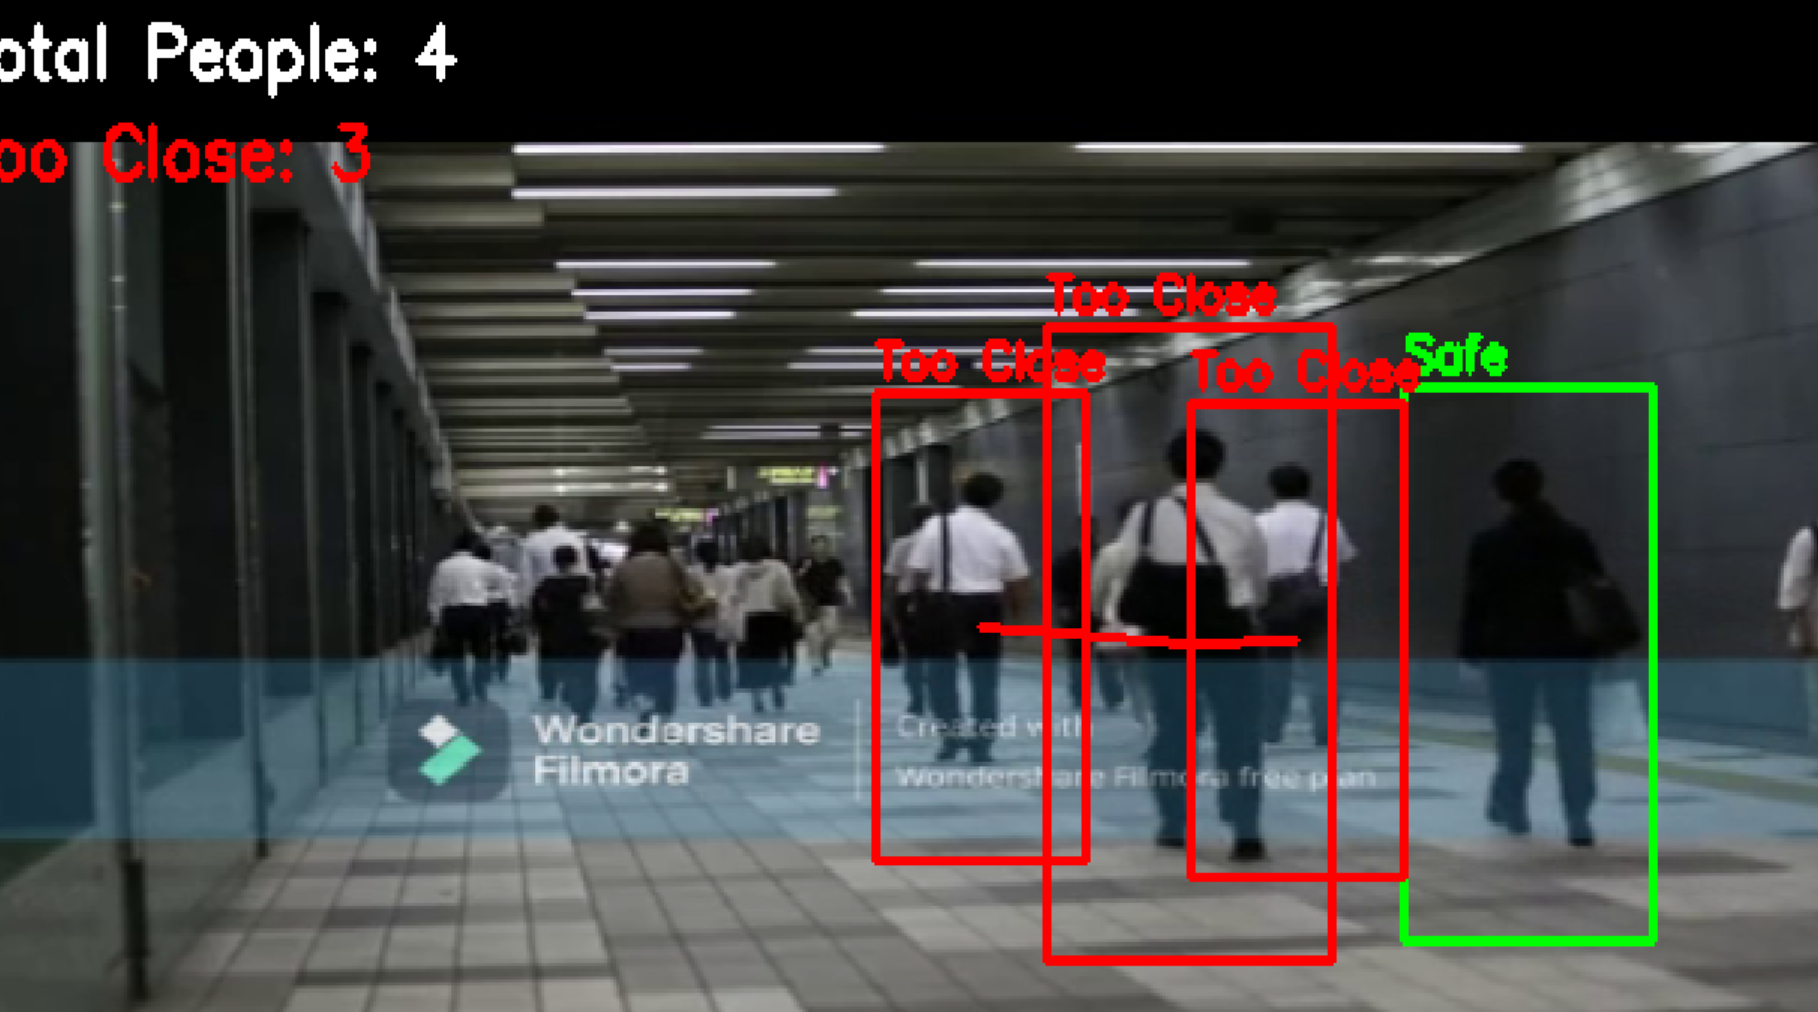